In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

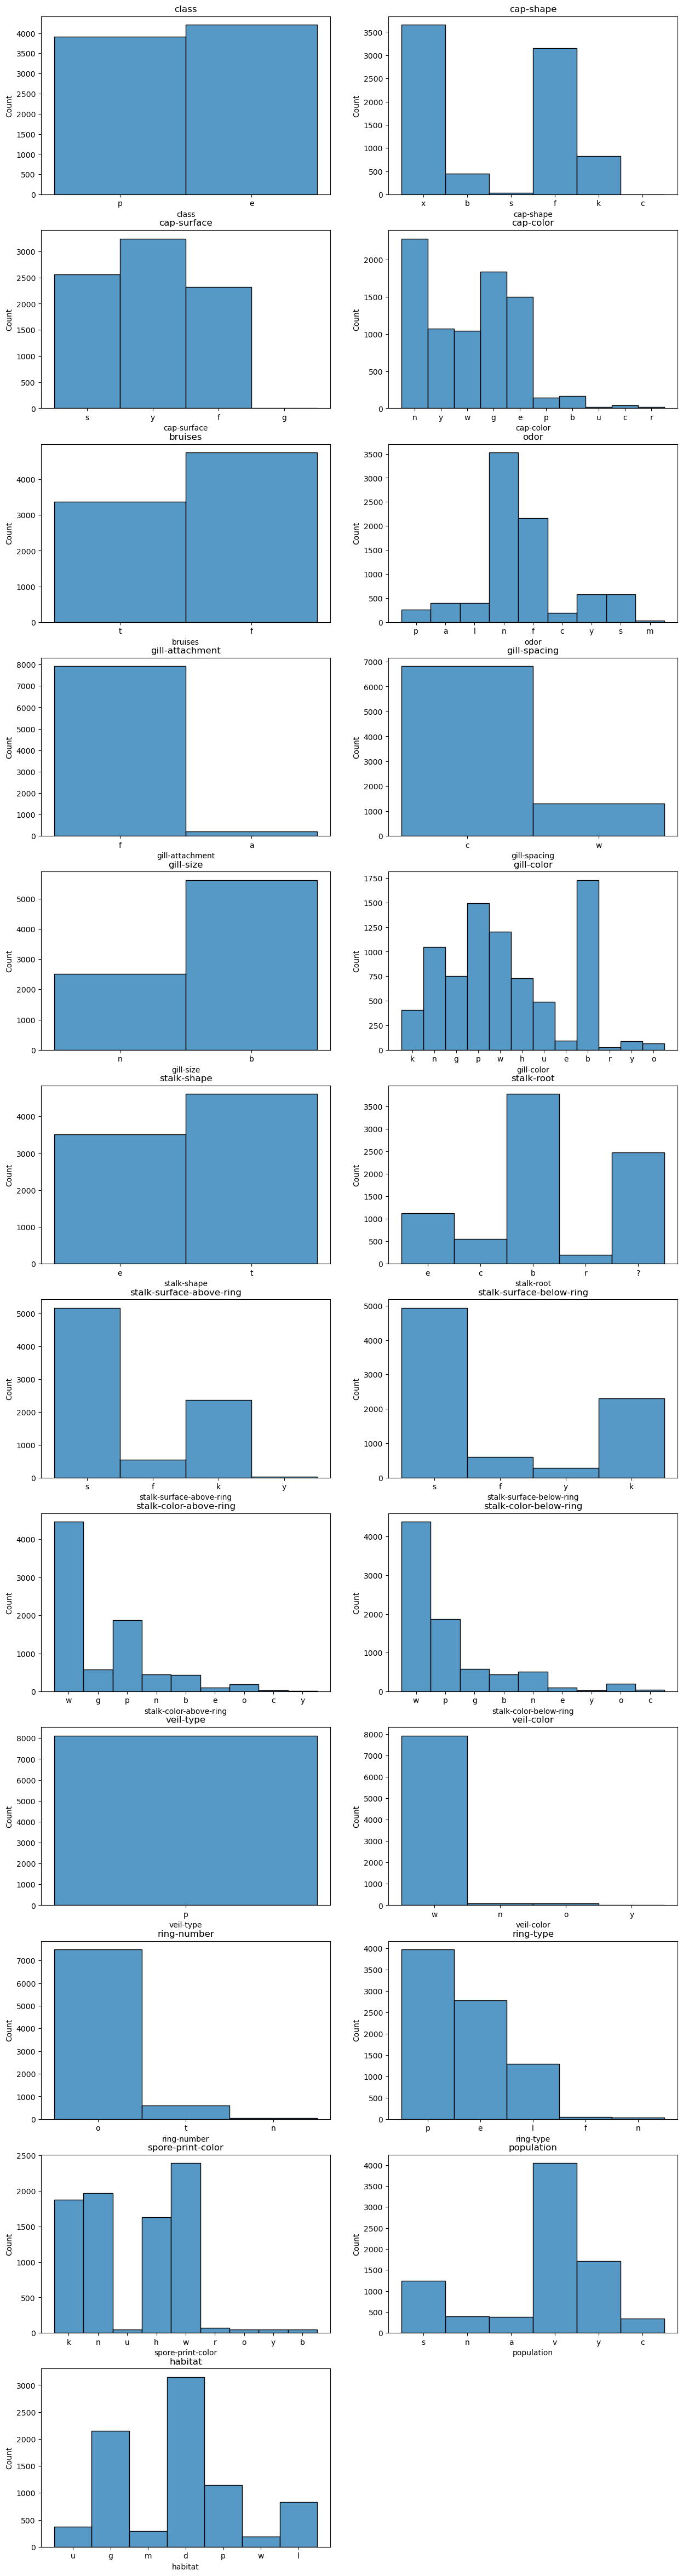

In [9]:
num_cols = len(df.columns)
cols_per_row = 2
num_rows = (num_cols + cols_per_row - 1) // cols_per_row
plt.figure(figsize=(15, 5 * num_rows))
for i,col in enumerate(df.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.histplot(df[col])
    plt.title(col)

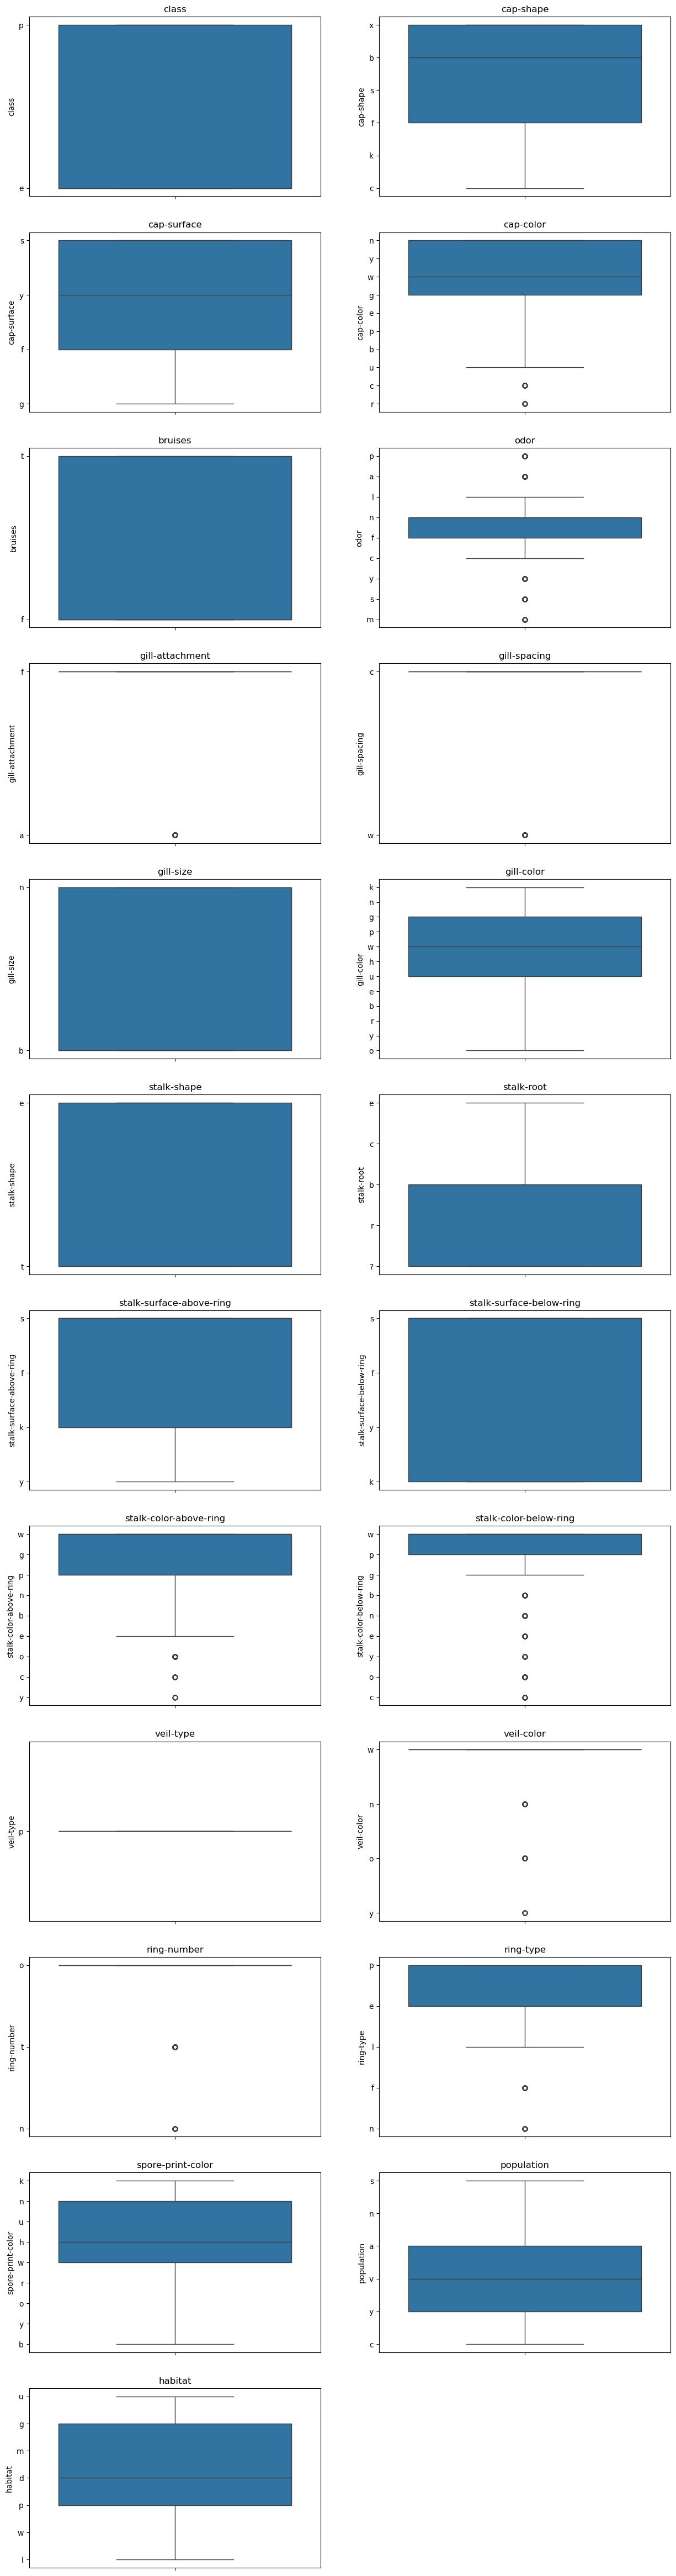

In [10]:
num_cols = len(df.columns)
cols_per_row = 2
num_rows = (num_cols + cols_per_row - 1) // cols_per_row
plt.figure(figsize=(15, 5 * num_rows))
for i,col in enumerate(df.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.boxplot(df[col])
    plt.title(col)

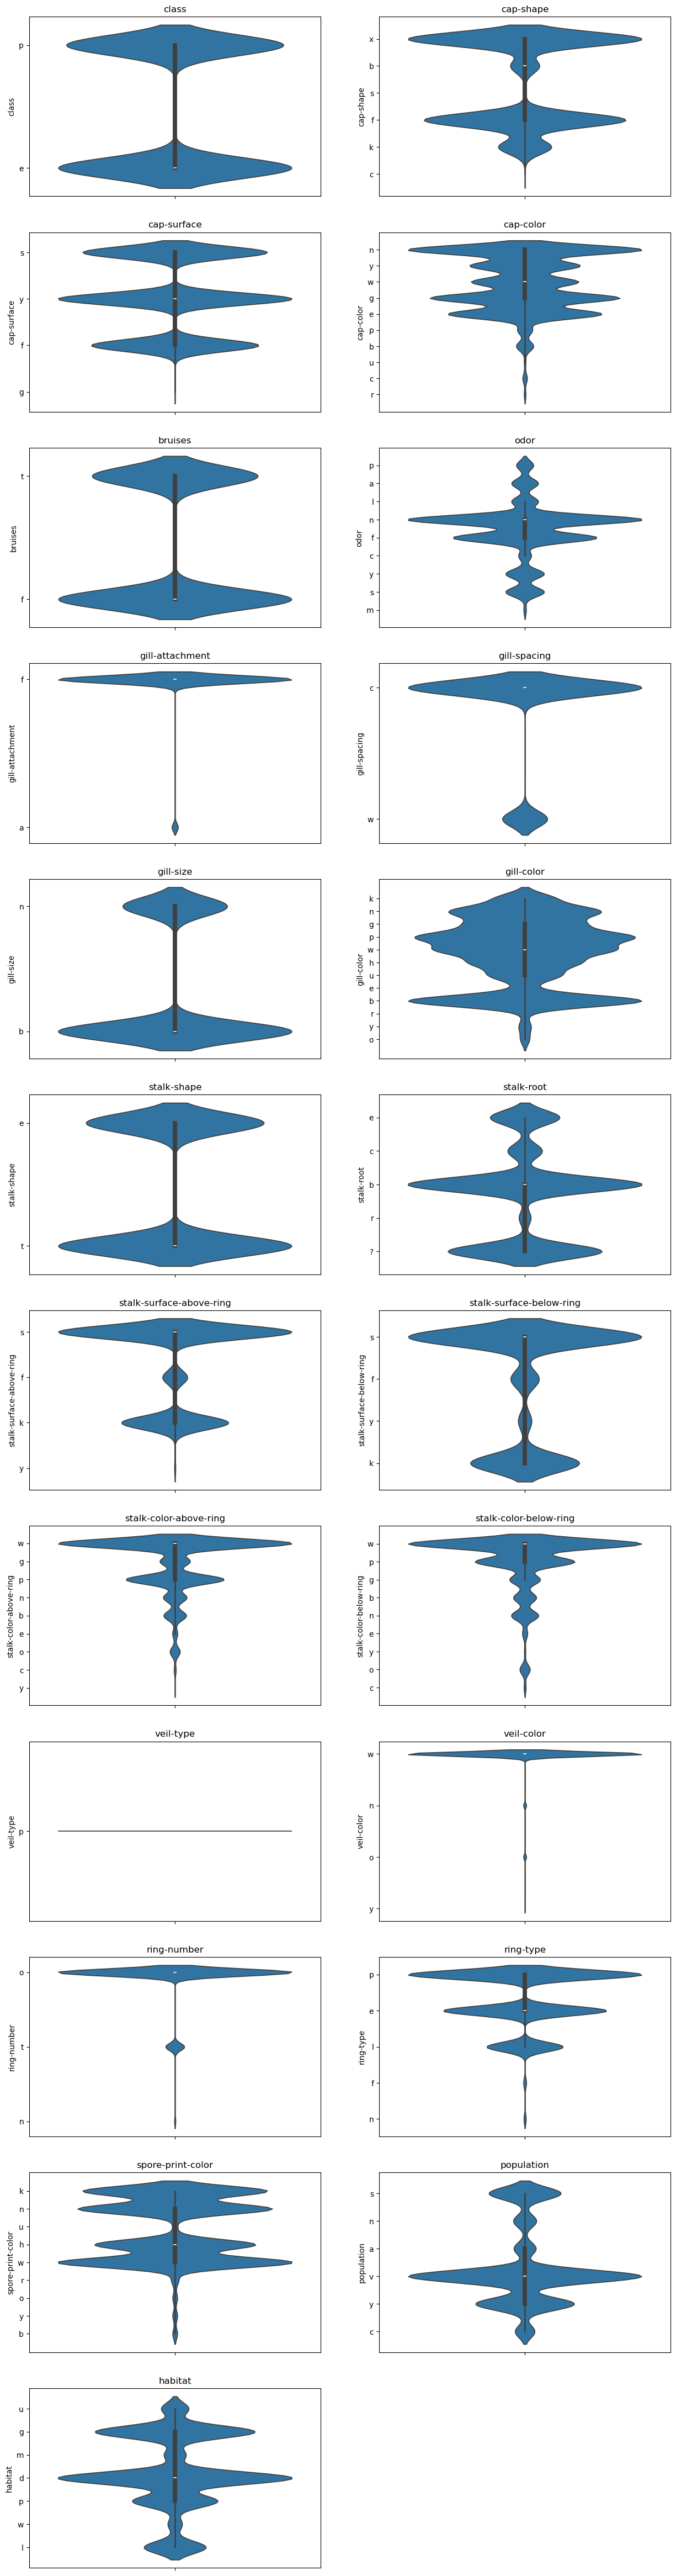

In [11]:
num_cols = len(df.columns)
cols_per_row = 2
num_rows = (num_cols + cols_per_row - 1) // cols_per_row
plt.figure(figsize=(15, 5 * num_rows))
for i,col in enumerate(df.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.violinplot(df[col])
    plt.title(col)

In [14]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

data_dict = df.to_dict(orient='records')
x = [i for i in data_dict]
y = [i.pop('class') for i in data_dict]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
y_train = np.array(y_train)

dv = DictVectorizer(sparse=False)
train_dicts = dv.fit_transform(x_train)
val_dicts = dv.transform(x_test)


In [16]:
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression()
}

for model_name,model in models.items():
    model.fit(train_dicts,y_train)
    y_pred = model.predict(val_dicts)
    print(f'{model_name} accuracy: {accuracy_score(y_test,y_pred)}')
    print(f'{model_name} classification report: {classification_report(y_test,y_pred)}')
    print(f'{model_name} confusion matrix: {confusion_matrix(y_test,y_pred)}')
    print('----------------------------------------------------------')
    

DecisionTree accuracy: 1.0
DecisionTree classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

DecisionTree confusion matrix: [[843   0]
 [  0 782]]
----------------------------------------------------------
RandomForest accuracy: 1.0
RandomForest classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

RandomForest confusion matrix: [[843   0]
 [  0 782]]
-----------------------------------------------------

c:\Users\nelli\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost accuracy: 1.0
AdaBoost classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AdaBoost confusion matrix: [[843   0]
 [  0 782]]
----------------------------------------------------------
LogisticRegression accuracy: 1.0
LogisticRegression classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

LogisticRegression confusion matrix: [[843   0]
 [  0 782]]
-----------------------------------------------

In [17]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=42)
cv_scores = []
for train_index,test_index in skf.split(train_dicts,y_train):
    x_train_fold,x_test_fold = train_dicts[train_index],train_dicts[test_index]
    y_train_fold,y_test_fold = y_train[train_index],y_train[test_index]
    model.fit(x_train_fold,y_train_fold)
    y_pred_fold = model.predict(x_test_fold)
    acc = accuracy_score(y_test_fold,y_pred_fold)
    cv_scores.append(acc)
print(f'Cross validation accuracy: {np.mean(cv_scores) * 100:.2f}%')

Cross validation accuracy: 100.00%


In [18]:
# Evaluate on the test set
y_test_pred = model.predict(val_dicts)

# Evaluating the model
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")

# Evaluate on the training set
y_train_pred = model.predict(train_dicts)

# Evaluating the model
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred) * 100:.2f}%")

# Feature Importance
feature_importances = model.feature_importances_
feature_names = dv.get_feature_names_out()
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))
print(cv_scores)

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Test Accuracy: 100.00%
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3365
           1       1.00      1.00      1.00      3134

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

Train Accuracy: 100.00%

Top 10 Most Important Features:
                        Feature  Importance
52                       odor=n    0.142607
49                       odor=f    0.066541
36                  gill-size=b    0.065901
71          spore-print-color=h  

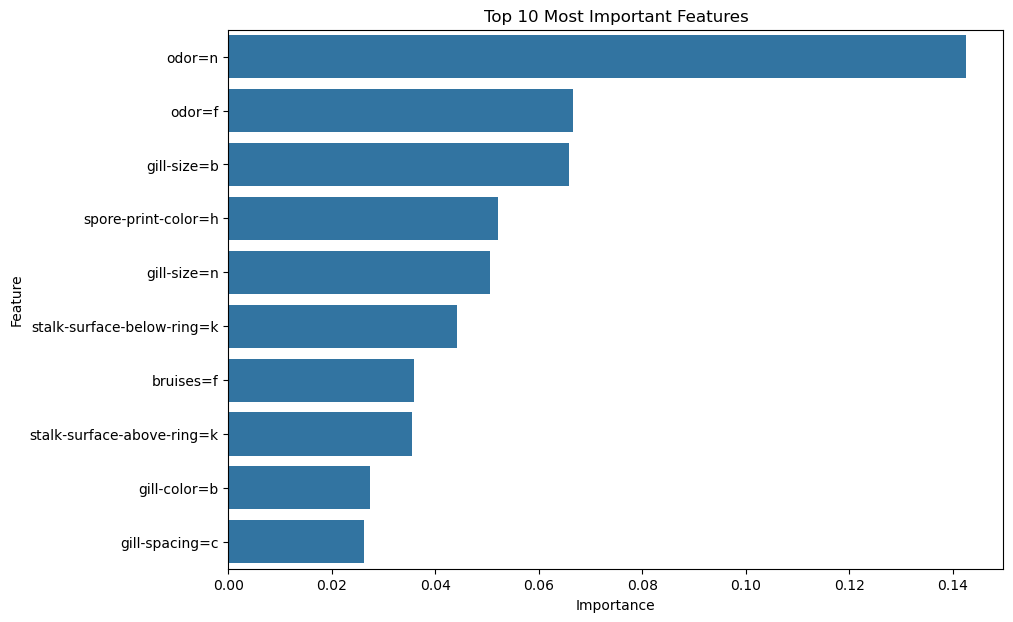

In [19]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Most Important Features")
plt.show()


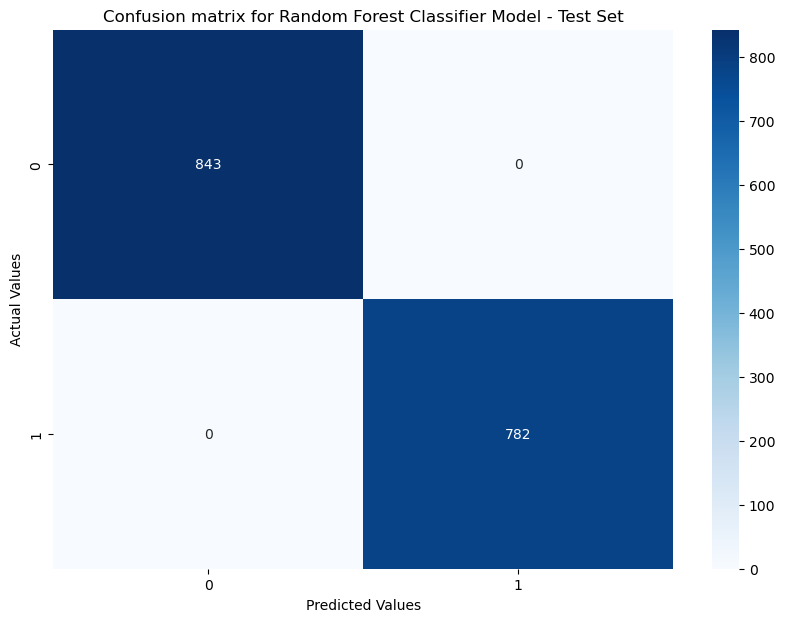

In [23]:
plt.figure(figsize=(10,7))
p = sns.heatmap(confusion_matrix(y_test_pred, y_pred), annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [25]:
x[0]

{'cap-shape': 'x',
 'cap-surface': 's',
 'cap-color': 'n',
 'bruises': 't',
 'odor': 'p',
 'gill-attachment': 'f',
 'gill-spacing': 'c',
 'gill-size': 'n',
 'gill-color': 'k',
 'stalk-shape': 'e',
 'stalk-root': 'e',
 'stalk-surface-above-ring': 's',
 'stalk-surface-below-ring': 's',
 'stalk-color-above-ring': 'w',
 'stalk-color-below-ring': 'w',
 'veil-type': 'p',
 'veil-color': 'w',
 'ring-number': 'o',
 'ring-type': 'p',
 'spore-print-color': 'k',
 'population': 's',
 'habitat': 'u'}

In [28]:
df.head(1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u


In [29]:
sample_data = [x[0]]
sample_vectorized_data = dv.transform(sample_data)
prediction = model.predict(sample_vectorized_data)
if prediction[0] == 1:
    print("The mushroom is poisonous.")
else:
    print("The mushroom is edible.")

The mushroom is poisonous.


In [31]:
# Filter the DataFrame for rows where habitat is 'g' and population is 'n'
df[(df['habitat'] == 'u') & (df['population'] == 's') & (df['cap-shape'] == 'x') & (df['cap-color'] == 'n') & (df['cap-surface'] == 's')]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
19,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,s,u
385,1,x,s,n,t,p,f,c,n,w,e,e,s,s,w,w,p,w,o,p,n,s,u
399,1,x,s,n,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,n,s,u
417,1,x,s,n,t,p,f,c,n,w,e,e,s,s,w,w,p,w,o,p,k,s,u
523,1,x,s,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,s,u
599,1,x,s,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
1039,1,x,s,n,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,s,u


In [32]:
data = {'cap-shape': 'x',
 'cap-surface': 's',
 'cap-color': 'n',
 'bruises': 't',
 'odor': 'p',
 'gill-attachment': 'f',
 'gill-spacing': 'c',
 'gill-size': 'n',
 'gill-color': 'k',
 'stalk-shape': 'e',
 'stalk-root': 'e',
 'stalk-surface-above-ring': 's',
 'stalk-surface-below-ring': 's',
 'stalk-color-above-ring': 'w',
 'stalk-color-below-ring': 'w',
 'veil-type': 'p',
 'veil-color': 'w',
 'ring-number': 'o',
 'ring-type': 'p',
 'spore-print-color': 'k',
 'population': 's',
 'habitat': 'u'
 }

sample_data = [data]
sample_person_vectorized = dv.transform(sample_data)

# Make the prediction
prediction = model.predict(sample_person_vectorized)

# Interpret the prediction
if prediction[0] == 1:
    print("The mushroom is likely to be poisonous.")
else:
    print("The mushroom is likely to be edible.")

The mushroom is likely to be poisonous.
